### 1. Data agumentation

이미지 증강의 성능 개선을 보자.

In [1]:
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


Saved under cats_and_dogs_filtered (1).zip


In [2]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
epochs=20
model = create_model()
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
100/100 - 37s - loss: 0.6916 - accuracy: 0.5185 - val_loss: 0.6778 - val_accuracy: 0.5690 - 37s/epoch - 370ms/step
Epoch 2/20
100/100 - 36s - loss: 0.6760 - accuracy: 0.5730 - val_loss: 0.6637 - val_accuracy: 0.5640 - 36s/epoch - 361ms/step
Epoch 3/20
100/100 - 37s - loss: 0.6473 - accuracy: 0.6255 - val_loss: 0.6199 - val_accuracy: 0.6670 - 37s/epoch - 374ms/step
Epoch 4/20
100/100 - 36s - loss: 0.6065 - accuracy: 0.6655 - val_loss: 0.5931 - val_accuracy: 0.6890 - 36s/epoch - 357ms/step
Epoch 5/20
100/100 - 37s - loss: 0.5742 - accuracy: 0.6955 - val_loss: 0.5718 - val_accuracy: 0.7130 - 37s/epoch - 367ms/step
Epoch 6/20
100/100 - 39s - loss: 0.5545 - accuracy: 0.7160 - val_loss: 0.5731 - val_accuracy: 0.6960 - 39s/epoch - 385ms/step
Epoch 7/20
100/100 - 37s - loss: 0.5297 - accuracy: 0.7295 - val_loss: 0.5705 - val_accuracy: 0.7020 - 37s/epoch - 368ms/step
Epoch 8/20
100/100 - 37s - loss: 0.5201 - accuracy: 0.7425 - val_loss: 0.5519 - val_accuracy: 0.7140 - 37s/epoch - 372

In [6]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Val acc')
    plt.title('acc')
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Val loss')
    plt.title('loss')
    plt.legend()
    plt.show()


ImageDataGenerator는 매 epoch마다 이미지 증강을 하여 batch를 생성한다.
즉 1번 학습할 때마다, 이미지 배치가 새로 생성되어 일반성을 더 가져갈 수 있다.

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,         # 픽셀조정
    rotation_range=40,      # 회전
    width_shift_range=0.2,  # 가로이동
    height_shift_range=0.2, # 세로 이동
    shear_range=0.2,        # 일부 영역을 압축, 늘리기    x' = x + m*y
                                                        #y' = n*x + y
    zoom_range=0.2,         # 이미지 확대
    horizontal_flip=True,   # 좌우 반전
    fill_mode = 'nearest')  # 새롭게 생성된 픽셀들을 채우는 방법.

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

model_aug = create_model()
history_aug = model_aug.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 38s - loss: 0.6934 - accuracy: 0.5175 - val_loss: 0.7046 - val_accuracy: 0.5000 - 38s/epoch - 384ms/step
Epoch 2/20
100/100 - 37s - loss: 0.6859 - accuracy: 0.5460 - val_loss: 0.7240 - val_accuracy: 0.5020 - 37s/epoch - 370ms/step
Epoch 3/20
100/100 - 37s - loss: 0.6788 - accuracy: 0.5650 - val_loss: 0.6616 - val_accuracy: 0.5950 - 37s/epoch - 370ms/step
Epoch 4/20
100/100 - 37s - loss: 0.6680 - accuracy: 0.5745 - val_loss: 0.6501 - val_accuracy: 0.6110 - 37s/epoch - 365ms/step
Epoch 5/20
100/100 - 36s - loss: 0.6587 - accuracy: 0.5940 - val_loss: 0.6355 - val_accuracy: 0.6220 - 36s/epoch - 356ms/step
Epoch 6/20
100/100 - 38s - loss: 0.6481 - accuracy: 0.6095 - val_loss: 0.6216 - val_accuracy: 0.6230 - 38s/epoch - 376ms/step
Epoch 7/20
100/100 - 36s - loss: 0.6339 - accuracy: 0.6385 - val_loss: 0.6121 - val_accuracy: 0.6480 - 36s/epoch - 356ms/step
Epoch 8/20
100/100 - 37s - loss: 0

이미지 증강을 한 것과 안 한것의 차이를 보자

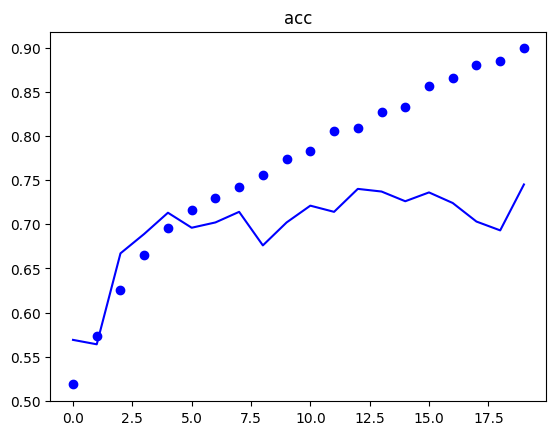

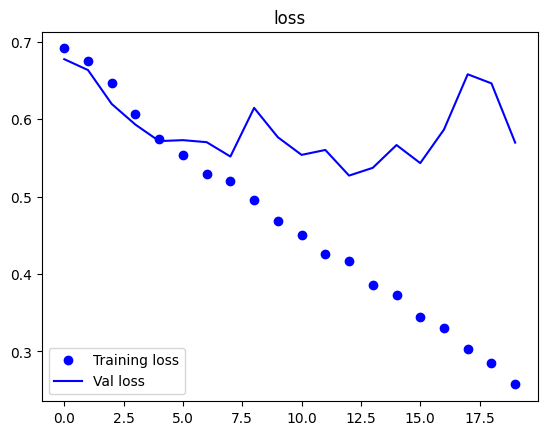

In [8]:
plot_loss_acc(history)

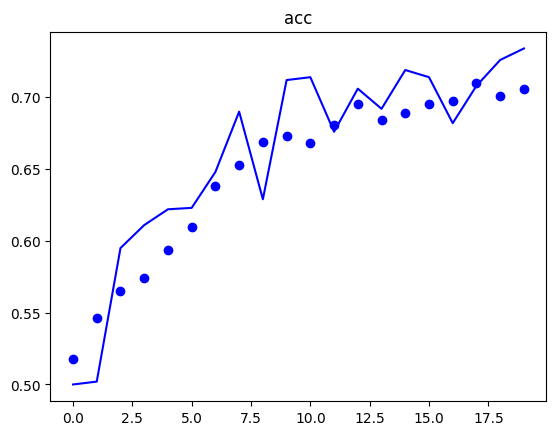

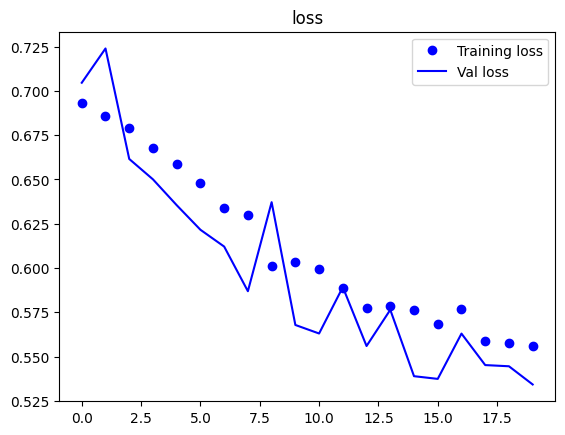

In [9]:
plot_loss_acc(history_aug)

### 2. Transfer Learning

Transfer Learning(전이 학습)은 

사전에 대규모의 데이터셋으로 학습한 모델을 가져와서 새로운 모델 학습에 저용하는 방법이다. 

크게 2가지로 구분 할 수 있는데, 
1. 사전 학습된 모델을 새로운 작업에 맞게 가중치는 재조정하면서 학습을 진행.
2. 사전 학습된 모델의 전체/일부를 feature extractor로 사용하는 것. (이때는 가져온 모델을 학습하지는 않는다.)


In [29]:
import wget
wget.download("https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5", "./")

'.//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

구굴의 이미지 분류 모델인 인셉션 모델을 가져와보자

In [30]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# 사전 학습 모델의 학습된 가중치 가져오기 
pre_trained_model.load_weights(local_weights_file)

# 가져온 모델의 레이어들 모두 학습 안되게
for layer in pre_trained_model.layers:
  layer.trainable = False

어디 한번 봐볼까?

In [31]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_572 (Conv2D)            (None, 74, 74, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_564 (Batch  (None, 74, 74, 32)  96          ['conv2d_572[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [32]:
# `mixed_7` 레이어를 가져와서 분류기로 사용해보자.
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [33]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model


# 다음과 같이 api형태로 모델을 정의 할 수 있다.

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
# 0,1 이진 분류니까 sigmoid
x = layers.Dense  (1, activation='sigmoid')(x)           

# 모델이 정의되는 부분
model = Model(pre_trained_model.input, x) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_572 (Conv2D)            (None, 74, 74, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_564 (Batch  (None, 74, 74, 32)  96          ['conv2d_572[0][0]']             
 Normalization)                                                                                   
                                                                                              

In [36]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [34]:
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [35]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 64s - loss: 0.3262 - accuracy: 0.8620 - val_loss: 0.1407 - val_accuracy: 0.9380 - 64s/epoch - 639ms/step
Epoch 2/20


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()